In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = "/content/drive/MyDrive/Tumor_Image_Classification/train"
valid_dir = "/content/drive/MyDrive/Tumor_Image_Classification/valid"
test_dir  = "/content/drive/MyDrive/Tumor_Image_Classification/test"

In [3]:
# Rescale pixel values
datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
val_data = datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load test data
test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 2180 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


In [ ]:
train_data.class_indices

{'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}

In [ ]:
# Pre Processing and Data augmentation

In [4]:
# Apply augmentation + rescaling for training data

train_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,        # randomly rotate images by 20 degrees
    zoom_range=0.2,           # zoom in by 20%
    width_shift_range=0.2,    # shift width by 20%
    height_shift_range=0.2,   # shift height by 20%
    shear_range=0.1,          # shear transformation
    horizontal_flip=True,     # flip image horizontally
    fill_mode='nearest'       # fill in newly created pixels
)

# No augmentation for validation/test (only rescale)
val_test_aug = ImageDataGenerator(rescale=1./255)

# Reload data using new augmentation generators
train_data = train_aug.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_data = val_test_aug.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = val_test_aug.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 2180 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


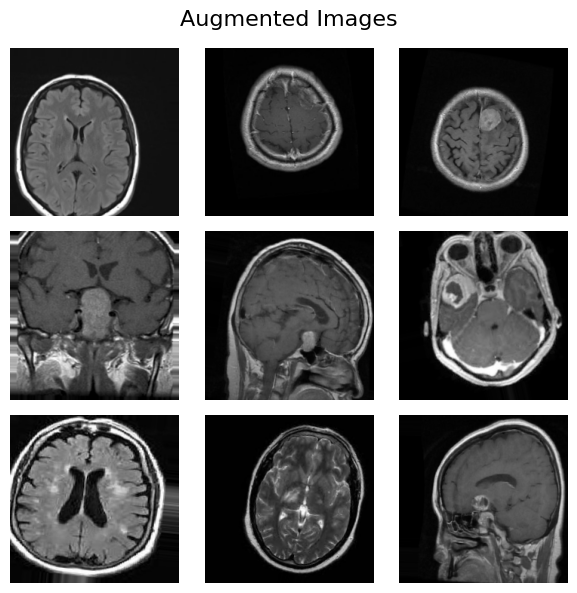

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Take one batch from the generator
x_batch, y_batch = next(train_data)

plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle("Augmented Images", fontsize=16)
plt.tight_layout()
plt.show()


## **# CNN Model Building**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))  # 4 output classes

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True),
    ModelCheckpoint('custom_cnn_best_model.h5', save_best_only=True)
]


In [ ]:
history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.4957 - loss: 10.9757 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 1206s 23s/step - accuracy: 0.4954 - loss: 10.8800 - val_accuracy: 0.2351 - val_loss: 45.1707
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 561ms/step - accuracy: 0.4136 - loss: 1.4605 - val_accuracy: 0.2351 - val_loss: 73.2691
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 556ms/step - accuracy: 0.4945 - loss: 1.3157 - val_accuracy: 0.2351 - val_loss: 47.2588
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.4741 - loss: 1.1991

53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 558ms/step - accuracy: 0.4740 - loss: 1.1997 - val_accuracy: 0.2351 - val_loss: 22.5213
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.4870 - loss: 1.1931

53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 608ms/step - accuracy: 0.4870 - loss: 1.1928 - val_accuracy: 0.2351 - val_loss: 16.7926
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.5163 - loss: 1.2043

53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 559ms/step - accuracy: 0.5158 - loss: 1.2041 - val_accuracy: 0.2351 - val_loss: 6.8521
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.5148 - loss: 1.1985

53/53 ━━━━━━━━━━━━━━━━━━━━ 31s 581ms/step - accuracy: 0.5146 - loss: 1.1995 - val_accuracy: 0.2550 - val_loss: 2.9353
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.5250 - loss: 1.1437

53/53 ━━━━━━━━━━━━━━━━━━━━ 32s 594ms/step - accuracy: 0.5249 - loss: 1.1461 - val_accuracy: 0.5438 - val_loss: 1.5536
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.5355 - loss: 1.1223

53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 569ms/step - accuracy: 0.5356 - loss: 1.1226 - val_accuracy: 0.4980 - val_loss: 1.0801
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.5346 - loss: 1.0681

53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 571ms/step - accuracy: 0.5344 - loss: 1.0689 - val_accuracy: 0.5657 - val_loss: 0.9824
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 555ms/step - accuracy: 0.5387 - loss: 1.0593 - val_accuracy: 0.5319 - val_loss: 0.9849
Epoch 12/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.5292 - loss: 1.0349

53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 561ms/step - accuracy: 0.5292 - loss: 1.0350 - val_accuracy: 0.6175 - val_loss: 0.8240
Epoch 13/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 564ms/step - accuracy: 0.5242 - loss: 1.0747 - val_accuracy: 0.5777 - val_loss: 0.9914
Epoch 14/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 572ms/step - accuracy: 0.5063 - loss: 1.1323 - val_accuracy: 0.6235 - val_loss: 0.8860
Epoch 15/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 31s 594ms/step - accuracy: 0.5246 - loss: 1.3750 - val_accuracy: 0.6315 - val_loss: 1.1089
Epoch 16/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 601ms/step - accuracy: 0.5218 - loss: 1.1669 - val_accuracy: 0.3625 - val_loss: 25.2133
Epoch 17/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 31s 577ms/step - accuracy: 0.4585 - loss: 1.2981 - val_accuracy: 0.4263 - val_loss: 1.3466


In [ ]:
!cp custom_cnn_best_model.h5 /content/drive/MyDrive/BPT/


In [2]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/BPT/custom_cnn_best_model.h5')

In [ ]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 117s 17s/step - accuracy: 0.6962 - loss: 0.6513
Test Accuracy: 61.38%
Test Loss: 0.7794


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step
              precision    recall  f1-score   support

      glioma       0.64      0.99      0.78        80
  meningioma       0.67      0.03      0.06        63
    no_tumor       0.90      0.39      0.54        49
   pituitary       0.52      0.94      0.67        54

    accuracy                           0.61       246
   macro avg       0.68      0.59      0.51       246
weighted avg       0.67      0.61      0.52       246



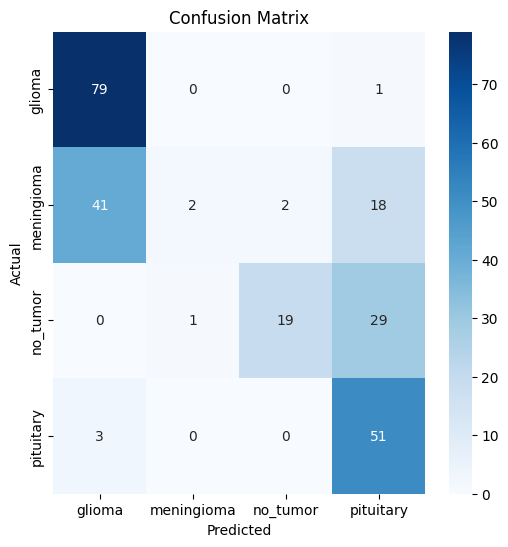

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# **RESNET50 Model**

In [26]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
base_model = ResNet50(
    weights='imagenet',
    include_top=False,  # exclude final FC layer
    input_shape=(224, 224, 3)
)

# Freeze base model
base_model.trainable = False


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4 tumor classes
])


In [7]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # lower LR for transfer learning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('resnet50_best_model.h5', save_best_only=True)
]


In [14]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2761 - loss: 1.8730 

53/53 ━━━━━━━━━━━━━━━━━━━━ 837s 16s/step - accuracy: 0.2761 - loss: 1.8706 - val_accuracy: 0.3606 - val_loss: 1.3327
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.2784 - loss: 1.6707

53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 564ms/step - accuracy: 0.2786 - loss: 1.6698 - val_accuracy: 0.2888 - val_loss: 1.3219
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.3074 - loss: 1.5536

53/53 ━━━━━━━━━━━━━━━━━━━━ 31s 583ms/step - accuracy: 0.3075 - loss: 1.5536 - val_accuracy: 0.3147 - val_loss: 1.3167
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.3190 - loss: 1.4817

53/53 ━━━━━━━━━━━━━━━━━━━━ 31s 574ms/step - accuracy: 0.3190 - loss: 1.4817 - val_accuracy: 0.3386 - val_loss: 1.2892
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 556ms/step - accuracy: 0.3043 - loss: 1.4899 - val_accuracy: 0.3327 - val_loss: 1.2903
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.3379 - loss: 1.4260

53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 561ms/step - accuracy: 0.3379 - loss: 1.4257 - val_accuracy: 0.3486 - val_loss: 1.2693
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 555ms/step - accuracy: 0.3662 - loss: 1.3551 - val_accuracy: 0.3705 - val_loss: 1.2704
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.3625 - loss: 1.3700

53/53 ━━━━━━━━━━━━━━━━━━━━ 31s 581ms/step - accuracy: 0.3626 - loss: 1.3700 - val_accuracy: 0.4084 - val_loss: 1.2487
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 42s 597ms/step - accuracy: 0.3585 - loss: 1.3550 - val_accuracy: 0.3586 - val_loss: 1.2533
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.3504 - loss: 1.3451

53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 616ms/step - accuracy: 0.3506 - loss: 1.3450 - val_accuracy: 0.5857 - val_loss: 1.2442


In [ ]:
# Fine Tune last 30 layers

In [9]:
for layer in base_model.layers[:-30]:
    layer.trainable = False
for layer in base_model.layers[-30:]:
    layer.trainable = True


In [10]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),  # delicate tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [17]:
history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,
    callbacks=callbacks
)


Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 64s 812ms/step - accuracy: 0.2350 - loss: 3.1579 - val_accuracy: 0.1952 - val_loss: 1.3197
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 563ms/step - accuracy: 0.5153 - loss: 1.1497 - val_accuracy: 0.1972 - val_loss: 1.5074
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 42s 589ms/step - accuracy: 0.6088 - loss: 0.9836 - val_accuracy: 0.1972 - val_loss: 1.5729
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 566ms/step - accuracy: 0.6750 - loss: 0.8633 - val_accuracy: 0.2072 - val_loss: 1.3359


In [18]:
!cp resnet50_best_model.h5 /content/drive/MyDrive/BPT/

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('resnet50_finetuned_v2.h5', save_best_only=True)
]

In [16]:
# Extend training
history_finetune_2 = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.4144 - loss: 1.2935

53/53 ━━━━━━━━━━━━━━━━━━━━ 636s 12s/step - accuracy: 0.4156 - loss: 1.2915 - val_accuracy: 0.2510 - val_loss: 1.6052
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5786 - loss: 0.9871

53/53 ━━━━━━━━━━━━━━━━━━━━ 493s 9s/step - accuracy: 0.5793 - loss: 0.9861 - val_accuracy: 0.3227 - val_loss: 1.4402
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6428 - loss: 0.8480

53/53 ━━━━━━━━━━━━━━━━━━━━ 501s 9s/step - accuracy: 0.6431 - loss: 0.8479 - val_accuracy: 0.3865 - val_loss: 1.2072
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6882 - loss: 0.7939

53/53 ━━━━━━━━━━━━━━━━━━━━ 502s 9s/step - accuracy: 0.6881 - loss: 0.7939 - val_accuracy: 0.6653 - val_loss: 0.9945
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7056 - loss: 0.7519

53/53 ━━━━━━━━━━━━━━━━━━━━ 493s 9s/step - accuracy: 0.7055 - loss: 0.7521 - val_accuracy: 0.7251 - val_loss: 0.7958
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7000 - loss: 0.7521

53/53 ━━━━━━━━━━━━━━━━━━━━ 479s 9s/step - accuracy: 0.7004 - loss: 0.7512 - val_accuracy: 0.7809 - val_loss: 0.6218
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7300 - loss: 0.6889

53/53 ━━━━━━━━━━━━━━━━━━━━ 484s 9s/step - accuracy: 0.7300 - loss: 0.6888 - val_accuracy: 0.7749 - val_loss: 0.6067
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7455 - loss: 0.6550

53/53 ━━━━━━━━━━━━━━━━━━━━ 480s 9s/step - accuracy: 0.7455 - loss: 0.6550 - val_accuracy: 0.7729 - val_loss: 0.5841
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 478s 9s/step - accuracy: 0.7491 - loss: 0.6605 - val_accuracy: 0.7629 - val_loss: 0.6336
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 479s 9s/step - accuracy: 0.7267 - loss: 0.6470 - val_accuracy: 0.7749 - val_loss: 0.5888


In [17]:
!cp resnet50_finetuned_v2.h5 /content/drive/MyDrive/BPT/

In [18]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/BPT/resnet50_finetuned_v2.h5')  # load best fine-tuned model




In [19]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 76s 10s/step - accuracy: 0.7953 - loss: 0.5498
Test Accuracy: 79.67%
Test Loss: 0.5559


In [20]:
import numpy as np

# Get predictions
y_pred_prob = model.predict(test_data)
y_pred_classes = np.argmax(y_pred_prob, axis=1)


8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step


In [21]:
# True labels
y_true = test_data.classes

# Class names in correct order
class_labels = list(test_data.class_indices.keys())


from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


Classification Report:
              precision    recall  f1-score   support

      glioma       0.81      0.89      0.85        80
  meningioma       0.73      0.52      0.61        63
    no_tumor       0.75      0.80      0.77        49
   pituitary       0.87      0.98      0.92        54

    accuracy                           0.80       246
   macro avg       0.79      0.80      0.79       246
weighted avg       0.79      0.80      0.79       246



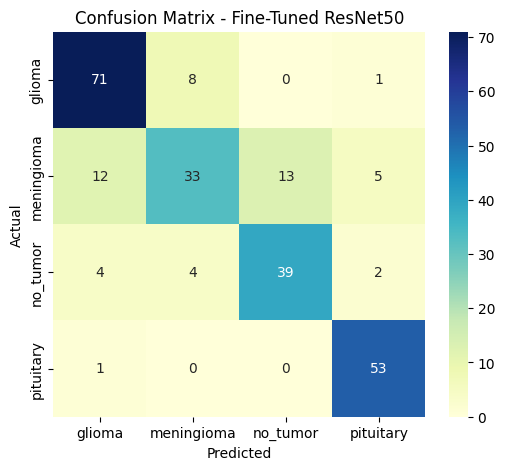

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Fine-Tuned ResNet50')
plt.show()


# **Weight adjusted Reset Model**

In [23]:
from sklearn.utils.class_weight import compute_class_weight

y_train = train_data.classes
weights_array = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), weights_array))


In [24]:
class_weights

{np.int32(0): np.float64(0.7513297872340425),
 np.int32(1): np.float64(1.183659217877095),
 np.int32(2): np.float64(1.2649253731343284),
 np.int32(3): np.float64(0.9674657534246576)}

In [28]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)


In [30]:
# Recompile the model after changing trainable layers and before applying class weights
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Using the same learning rate as fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_weighted = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    class_weight=class_weights,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ModelCheckpoint('resnet50_weighted_meningioma.h5', save_best_only=True)
    ]
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.7556 - loss: 0.6505 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


53/53 ━━━━━━━━━━━━━━━━━━━━ 1317s 25s/step - accuracy: 0.7556 - loss: 0.6506 - val_accuracy: 0.7510 - val_loss: 0.5881
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.7527 - loss: 0.6333 

53/53 ━━━━━━━━━━━━━━━━━━━━ 1282s 24s/step - accuracy: 0.7527 - loss: 0.6336 - val_accuracy: 0.7769 - val_loss: 0.5665
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1264s 24s/step - accuracy: 0.7646 - loss: 0.6071 - val_accuracy: 0.7590 - val_loss: 0.5777
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.7652 - loss: 0.5979 

53/53 ━━━━━━━━━━━━━━━━━━━━ 1308s 25s/step - accuracy: 0.7652 - loss: 0.5980 - val_accuracy: 0.7769 - val_loss: 0.5533
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1312s 25s/step - accuracy: 0.7829 - loss: 0.5981 - val_accuracy: 0.7729 - val_loss: 0.6225
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.7787 - loss: 0.5804 

53/53 ━━━━━━━━━━━━━━━━━━━━ 1242s 23s/step - accuracy: 0.7785 - loss: 0.5802 - val_accuracy: 0.7968 - val_loss: 0.5416
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1294s 24s/step - accuracy: 0.7890 - loss: 0.5485 - val_accuracy: 0.7171 - val_loss: 0.6877
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1248s 24s/step - accuracy: 0.7838 - loss: 0.5755 - val_accuracy: 0.7849 - val_loss: 0.5440
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.7823 - loss: 0.5582 

53/53 ━━━━━━━━━━━━━━━━━━━━ 1291s 24s/step - accuracy: 0.7822 - loss: 0.5585 - val_accuracy: 0.8008 - val_loss: 0.5401
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1254s 24s/step - accuracy: 0.8099 - loss: 0.5363 - val_accuracy: 0.7271 - val_loss: 0.6733


In [31]:
!cp resnet50_weighted_meningioma.h5 /content/drive/MyDrive/BPT/

In [1]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/BPT/resnet50_weighted_meningioma.h5')

In [7]:
loss, accuracy = model.evaluate(test_data)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 92s 12s/step - accuracy: 0.7729 - loss: 0.4959


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 632ms/step
              precision    recall  f1-score   support

      glioma       0.82      0.86      0.84        80
  meningioma       0.72      0.49      0.58        63
    no_tumor       0.79      0.86      0.82        49
   pituitary       0.80      0.98      0.88        54

    accuracy                           0.79       246
   macro avg       0.78      0.80      0.78       246
weighted avg       0.79      0.79      0.78       246



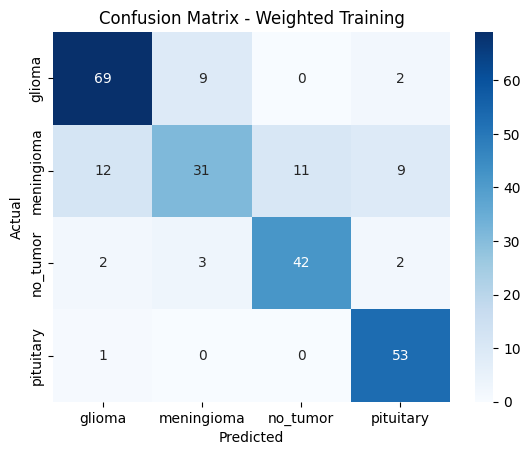

In [9]:
# Prediction and report
import numpy as np
y_pred = np.argmax(model.predict(test_data), axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Weighted Training")
plt.show()


# **Meningioma Augmented ResNet Model**

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os

# Source and destination
source_dir = "/content/drive/MyDrive/Tumor_Image_Classification/train/meningioma"
augmented_dir = source_dir  # augment in-place

# Create an ImageDataGenerator for augmentation
augmentor = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# How many augmented images you want to create
num_augmented = 500  # or 2x your original meningioma count

images = os.listdir(source_dir)
count = 0

for image_name in images:
    img_path = os.path.join(source_dir, image_name)
    img = load_img(img_path)  # Load image
    x = img_to_array(img)     # Convert to array
    x = x.reshape((1,) + x.shape)  # Reshape

    # Generate and save augmented images
    for batch in augmentor.flow(x, batch_size=1, save_to_dir=augmented_dir, save_prefix='aug', save_format='jpg'):
        count += 1
        if count >= num_augmented:
            break
    if count >= num_augmented:
        break

print(f"{count} augmented images saved to {augmented_dir}")


500 augmented images saved to /content/drive/MyDrive/Tumor_Image_Classification/train/meningioma


In [14]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/BPT/resnet50_finetuned_v2.h5')  # load best fine-tuned model

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(
    optimizer=Adam(learning_rate=1e-5),  # delicate tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_aug = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ModelCheckpoint('resnet50_augmented_meningioma.h5', save_best_only=True)
    ]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.7154 - loss: 0.7058 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 933s 13s/step - accuracy: 0.7158 - loss: 0.7050 - val_accuracy: 0.7709 - val_loss: 0.6042
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 43s 609ms/step - accuracy: 0.7790 - loss: 0.5871 - val_accuracy: 0.7470 - val_loss: 0.6326
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.8017 - loss: 0.5036

69/69 ━━━━━━━━━━━━━━━━━━━━ 83s 625ms/step - accuracy: 0.8017 - loss: 0.5036 - val_accuracy: 0.7829 - val_loss: 0.5816
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 0.8029 - loss: 0.5180

69/69 ━━━━━━━━━━━━━━━━━━━━ 82s 620ms/step - accuracy: 0.8029 - loss: 0.5180 - val_accuracy: 0.7948 - val_loss: 0.5656
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.8033 - loss: 0.5066

69/69 ━━━━━━━━━━━━━━━━━━━━ 43s 622ms/step - accuracy: 0.8034 - loss: 0.5065 - val_accuracy: 0.7968 - val_loss: 0.5597
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 81s 612ms/step - accuracy: 0.8202 - loss: 0.4844 - val_accuracy: 0.7689 - val_loss: 0.6210
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.7956 - loss: 0.5247

69/69 ━━━━━━━━━━━━━━━━━━━━ 43s 625ms/step - accuracy: 0.7958 - loss: 0.5243 - val_accuracy: 0.8028 - val_loss: 0.5490
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 43s 622ms/step - accuracy: 0.8127 - loss: 0.4523 - val_accuracy: 0.8008 - val_loss: 0.5529
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.8254 - loss: 0.4432

69/69 ━━━━━━━━━━━━━━━━━━━━ 44s 638ms/step - accuracy: 0.8254 - loss: 0.4434 - val_accuracy: 0.8108 - val_loss: 0.5385
Epoch 10/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - accuracy: 0.8275 - loss: 0.4491

69/69 ━━━━━━━━━━━━━━━━━━━━ 44s 632ms/step - accuracy: 0.8275 - loss: 0.4489 - val_accuracy: 0.7988 - val_loss: 0.5174


In [17]:
!cp resnet50_augmented_meningioma.h5 /content/drive/MyDrive/BPT/

In [18]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/BPT/resnet50_augmented_meningioma.h5")


In [19]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 360ms/step - accuracy: 0.7327 - loss: 0.5513
Test Accuracy: 79.67%
Test Loss: 0.4779


In [20]:
import numpy as np

# Get predicted class indices
y_pred_probs = model.predict(test_data)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = test_data.classes

# Class label names (in correct order)
class_labels = list(test_data.class_indices.keys())


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 739ms/step


In [21]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


Classification Report:
              precision    recall  f1-score   support

      glioma       0.89      0.72      0.80        80
  meningioma       0.60      0.71      0.65        63
    no_tumor       0.80      0.90      0.85        49
   pituitary       0.96      0.91      0.93        54

    accuracy                           0.80       246
   macro avg       0.81      0.81      0.81       246
weighted avg       0.81      0.80      0.80       246



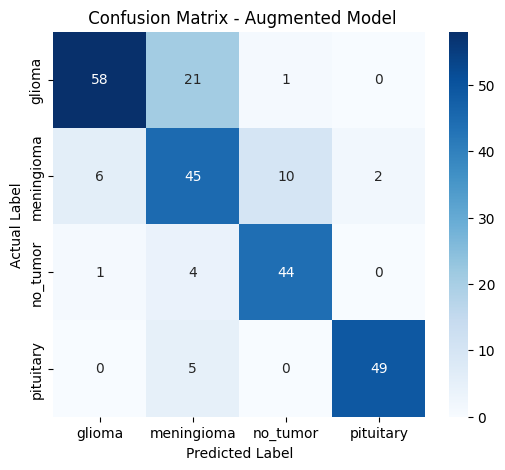

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title(' Confusion Matrix - Augmented Model')
plt.show()


# **MOBILENET**

In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Set input shape same as before
input_shape = (224, 224, 3)

# Load MobileNetV2 without the top layers
base_model = MobileNetV2(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze initial layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(4, activation='softmax')(x)  # 4 classes

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('mobilenetv2_tumor_model.h5', save_best_only=True)
]

history_mobilenet = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=callbacks
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.3890 - loss: 1.4029

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 791s 11s/step - accuracy: 0.3907 - loss: 1.3993 - val_accuracy: 0.6454 - val_loss: 0.8734
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7003 - loss: 0.7670

69/69 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.7007 - loss: 0.7662 - val_accuracy: 0.7351 - val_loss: 0.6995
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7863 - loss: 0.5900

69/69 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.7864 - loss: 0.5897 - val_accuracy: 0.7510 - val_loss: 0.6237
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8276 - loss: 0.5000

69/69 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.8276 - loss: 0.4998 - val_accuracy: 0.7849 - val_loss: 0.5520
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8500 - loss: 0.4179

69/69 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.8500 - loss: 0.4180 - val_accuracy: 0.7849 - val_loss: 0.5319
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8626 - loss: 0.3626

69/69 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8624 - loss: 0.3630 - val_accuracy: 0.7948 - val_loss: 0.5073
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8758 - loss: 0.3567

69/69 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.8757 - loss: 0.3568 - val_accuracy: 0.7968 - val_loss: 0.5029
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8771 - loss: 0.3523

69/69 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.8773 - loss: 0.3520 - val_accuracy: 0.8068 - val_loss: 0.4870
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8847 - loss: 0.3217

69/69 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8846 - loss: 0.3216 - val_accuracy: 0.8028 - val_loss: 0.4770
Epoch 10/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.8929 - loss: 0.2867 - val_accuracy: 0.7968 - val_loss: 0.5117


In [9]:
!cp mobilenetv2_tumor_model.h5 /content/drive/MyDrive/BPT/

In [10]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/BPT/mobilenetv2_tumor_model.h5")

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7638 - loss: 0.5563
Test Accuracy: 77.64%
Test Loss: 0.5147
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.90      0.86      0.88        80
  meningioma       0.76      0.51      0.61        63
    no_tumor       0.88      0.73      0.80        49
   pituitary       0.63      1.00      0.77        54

    accuracy                           0.78       246
   macro avg       0.79      0.78      0.76       246
weighted avg       0.80      0.78      0.77       246



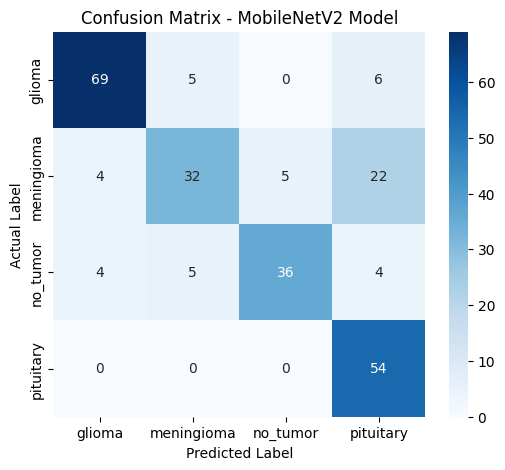

In [12]:
# Evaluation

loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# Classification Report

from sklearn.metrics import classification_report
import numpy as np

# Get true labels
y_true = test_data.classes

# Get class labels
class_labels = list(test_data.class_indices.keys())

# Predict probabilities and convert to class indices
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


# Confusion matrix and Heatmap

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - MobileNetV2 Model")
plt.show()



# **INCEPTION V3 MODEL**

In [5]:
from tensorflow.keras.applications import InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [6]:
num_classes = 4

#Load model
base_model_incep = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_incep.trainable = False  # freeze base

# Build model on top

x = base_model_incep.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model_incep = Model(inputs=base_model_incep.input, outputs=predictions)


# Compile model

model_incep.compile(optimizer=Adam(learning_rate=1e-4),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
# Train the model

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('inceptionv3_model.h5', save_best_only=True)
]

history_incep = model_incep.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=callbacks
)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.3733 - loss: 1.5254 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 1822s 26s/step - accuracy: 0.3743 - loss: 1.5228 - val_accuracy: 0.6135 - val_loss: 0.9401
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.5609 - loss: 1.0495

69/69 ━━━━━━━━━━━━━━━━━━━━ 38s 546ms/step - accuracy: 0.5612 - loss: 1.0487 - val_accuracy: 0.6633 - val_loss: 0.8233
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.6560 - loss: 0.8511

69/69 ━━━━━━━━━━━━━━━━━━━━ 37s 530ms/step - accuracy: 0.6562 - loss: 0.8508 - val_accuracy: 0.7032 - val_loss: 0.7364
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.6657 - loss: 0.7939

69/69 ━━━━━━━━━━━━━━━━━━━━ 41s 531ms/step - accuracy: 0.6656 - loss: 0.7941 - val_accuracy: 0.7131 - val_loss: 0.7045
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.7209 - loss: 0.7174

69/69 ━━━━━━━━━━━━━━━━━━━━ 42s 541ms/step - accuracy: 0.7209 - loss: 0.7173 - val_accuracy: 0.7271 - val_loss: 0.6666
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 36s 517ms/step - accuracy: 0.7431 - loss: 0.6823 - val_accuracy: 0.7211 - val_loss: 0.6687
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.7396 - loss: 0.6470

69/69 ━━━━━━━━━━━━━━━━━━━━ 37s 535ms/step - accuracy: 0.7395 - loss: 0.6472 - val_accuracy: 0.7410 - val_loss: 0.6420
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.7692 - loss: 0.6027

69/69 ━━━━━━━━━━━━━━━━━━━━ 38s 555ms/step - accuracy: 0.7691 - loss: 0.6029 - val_accuracy: 0.7470 - val_loss: 0.6176
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.7589 - loss: 0.6065

69/69 ━━━━━━━━━━━━━━━━━━━━ 38s 556ms/step - accuracy: 0.7590 - loss: 0.6064 - val_accuracy: 0.7610 - val_loss: 0.5974
Epoch 10/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 37s 533ms/step - accuracy: 0.7615 - loss: 0.5928 - val_accuracy: 0.7709 - val_loss: 0.5991


In [7]:
!cp inceptionv3_model.h5 /content/drive/MyDrive/BPT/

In [8]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/BPT/inceptionv3_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 127s 17s/step - accuracy: 0.6857 - loss: 0.6888
Test Accuracy: 68.29%
Test Loss: 0.6982
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.80      0.82      0.81        80
  meningioma       0.46      0.25      0.33        63
    no_tumor       0.80      0.80      0.80        49
   pituitary       0.59      0.87      0.71        54

    accuracy                           0.68       246
   macro avg       0.66      0.69      0.66       246
weighted avg       0.66      0.68      0.66       246



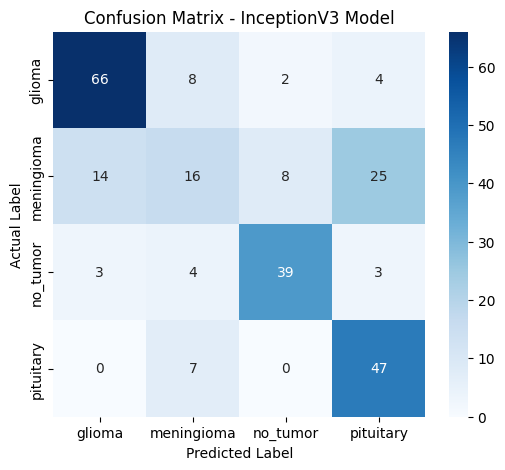

In [9]:
# Evaluation

loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# Classification Report

from sklearn.metrics import classification_report
import numpy as np

# Get true labels
y_true = test_data.classes

# Get class labels
class_labels = list(test_data.class_indices.keys())

# Predict probabilities and convert to class indices
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


# Confusion matrix and Heatmap

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - InceptionV3 Model")
plt.show()

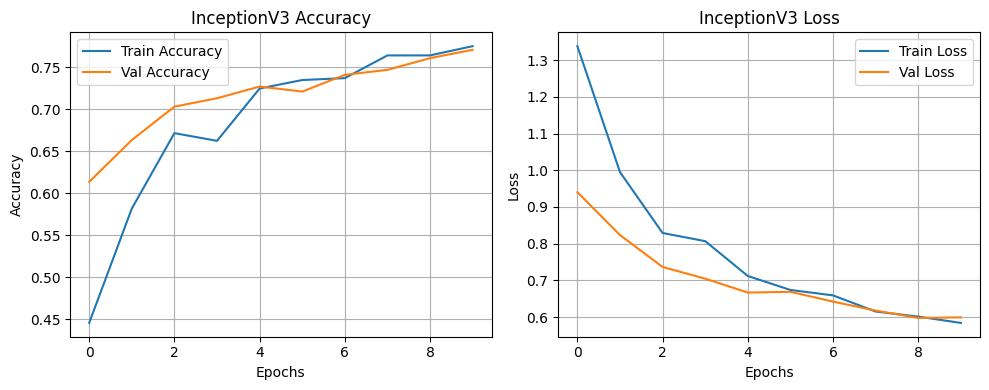

In [30]:
import matplotlib.pyplot as plt

# Example: change this to your actual history variable name if different
history = history_incep  # replace with actual variable name

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('InceptionV3 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('InceptionV3 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# **EfficientNet B0 Model**

In [10]:
from tensorflow.keras.applications import EfficientNetB0

# Load Model

base_model_eff = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_eff.trainable = False

# Build Model on Top

x = base_model_eff.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model_eff = Model(inputs=base_model_eff.input, outputs=predictions)

# Compile

model_eff.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
# Train
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('efficientnetb0_model.h5', save_best_only=True)
]

history_eff = model_eff.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=callbacks
)



16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.3150 - loss: 1.3867

69/69 ━━━━━━━━━━━━━━━━━━━━ 86s 905ms/step - accuracy: 0.3155 - loss: 1.3865 - val_accuracy: 0.2470 - val_loss: 1.4145
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.3590 - loss: 1.3499

69/69 ━━━━━━━━━━━━━━━━━━━━ 38s 554ms/step - accuracy: 0.3590 - loss: 1.3499 - val_accuracy: 0.2470 - val_loss: 1.4061
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.3751 - loss: 1.3424

69/69 ━━━━━━━━━━━━━━━━━━━━ 37s 541ms/step - accuracy: 0.3751 - loss: 1.3425 - val_accuracy: 0.2470 - val_loss: 1.4010
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.3780 - loss: 1.3422

69/69 ━━━━━━━━━━━━━━━━━━━━ 36s 522ms/step - accuracy: 0.3779 - loss: 1.3423 - val_accuracy: 0.2470 - val_loss: 1.3884
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 41s 577ms/step - accuracy: 0.3771 - loss: 1.3462 - val_accuracy: 0.2470 - val_loss: 1.3894
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 36s 526ms/step - accuracy: 0.3865 - loss: 1.3332 - val_accuracy: 0.2470 - val_loss: 1.3897
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 41s 590ms/step - accuracy: 0.3598 - loss: 1.3610 - val_accuracy: 0.2470 - val_loss: 1.3941


In [11]:
!cp efficientnetb0_model.h5 /content/drive/MyDrive/BPT/

In [12]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/BPT/efficientnetb0_model.h5")

In [14]:
# Evaluation

loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# Classification Report

from sklearn.metrics import classification_report
import numpy as np

# Get true labels
y_true = test_data.classes

# Get class labels
class_labels = list(test_data.class_indices.keys())

# Predict probabilities and convert to class indices
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


# Confusion matrix and Heatmap

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.2286 - loss: 1.3241
Test Accuracy: 25.61%
Test Loss: 1.3833
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00        80
  meningioma       0.26      1.00      0.41        63
    no_tumor       0.00      0.00      0.00        49
   pituitary       0.00      0.00      0.00        54

    accuracy                           0.26       246
   macro avg       0.06      0.25      0.10       246
weighted avg       0.07      0.26      0.10       246



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **MODEL Comparison**

In [15]:
import pandas as pd

comparison_df = pd.DataFrame({
    'Model': ['Custom CNN', 'ResNet50', 'MobileNetV2', 'InceptionV3', 'EfficientNetB0'],
    'Test Accuracy': [0.6138, 0.80, 0.78, 0.68, 0.26],
    'Test Precision': [0.67, 0.81, 0.80, 0.66, 0.07],
    'Test Recall': [0.61, 0.81, 0.78, 0.68, 0.26],
    'Test F1-Score': [0.52, 0.80, 0.77, 0.66, 0.10]
})

comparison_df


,Model,Test Accuracy,Test Precision,Test Recall,Test F1-Score
0,Custom CNN,0.6138,0.67,0.61,0.52
1,ResNet50,0.8000,0.81,0.81,0.80
2,MobileNetV2,0.7800,0.80,0.78,0.77
3,InceptionV3,0.6800,0.66,0.68,0.66
4,EfficientNetB0,0.2600,0.07,0.26,0.10


In [16]:
comparison_df.to_csv('/content/drive/MyDrive/model_comparison_results.csv', index=False)


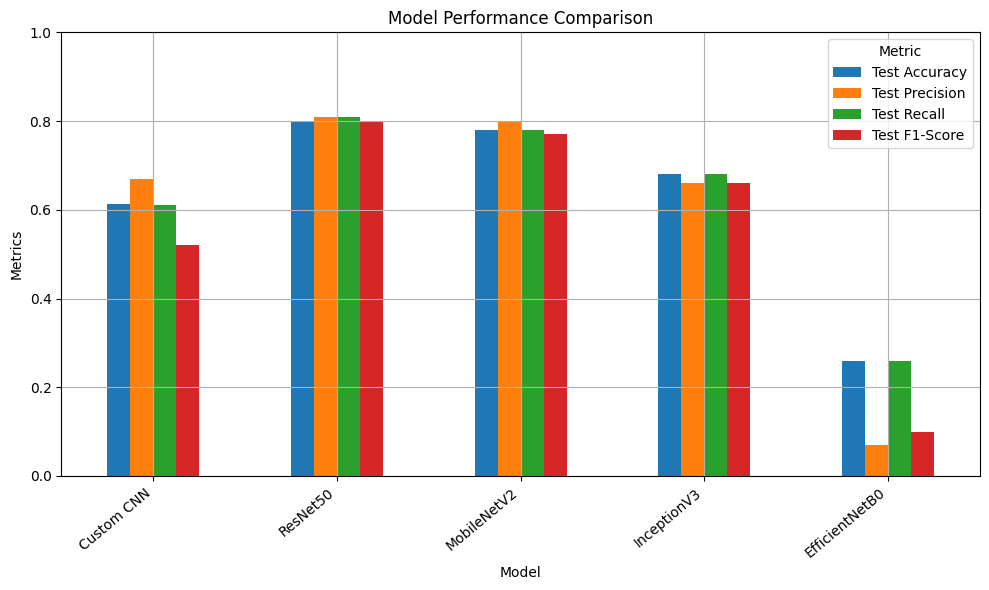

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
metrics = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score']
comparison_df.plot(x='Model', y=metrics, kind='bar', ax=plt.gca())
plt.title('Model Performance Comparison')
plt.ylabel('Metrics')
plt.xticks(rotation= 40, ha = 'right')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Metric')
plt.show()


# **Streamlit**

In [20]:
!pip install streamlit streamlit_option_menu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 133.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 130.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.1 MB/s eta 0:00:00


In [25]:
%%writefile tumor.py

import streamlit as st
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os

model = load_model('/content/drive/MyDrive/BPT/resnet50_augmented_meningioma.h5')

# Class labels (in same order as your training)
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Page setup
st.title("Brain Tumor MRI Classifier")
st.write("Upload an MRI image to predict the tumor type.")

# Upload image
uploaded_file = st.file_uploader("Choose an MRI image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # Display the image
    img = Image.open(uploaded_file).convert("RGB")
    st.image(img, caption="Uploaded Image", use_container_width=True)

    # Preprocess image
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    # Predict
    if st.button("Predict"):
        prediction = model.predict(img_array)
        predicted_class = class_labels [np.argmax(prediction)]
        confidence = np.max(prediction) * 100

        st.success(f"Predicted Tumor Type: **{predicted_class}**")
        st.info(f"Confidence: {confidence:.2f}%")

Overwriting tumor.py


In [22]:
!wget -q -O - ipv4.icanhazip.com   # this command will generate a password for you(copy that)

35.240.195.180


In [26]:
! streamlit run tumor.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.240.195.180:8501

⠼⠴⠦⠧your url is: https://large-jeans-heal.loca.lt
2025-07-12 08:26:15.687 Uncaught exception GET /_stcore/stream (127.0.0.1)
HTTPServerRequest(protocol='http', host='large-jeans-heal.loca.lt', method='GET', uri='/_stcore/stream', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/web/bootstrap.py", line 348, in run
    if asyncio.get_running_loop().is_running():
       ^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: no running event loop

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/tornado/websocket.py", line 938, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
                  